In [1]:
import pandas as panda
import numpy as numpy
numpy.random.seed(42)
from pandas.api.types import is_numeric_dtype
import csv as csv

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import learning_curve

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

from datetime import datetime
import pytz

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

output_notebook() # inline display of bokeh graphs

Loading BokehJS ...

## Loading the data ##


In [2]:
completeDataset = panda.read_csv('since2010aroundNY.csv')
nrRows = len(completeDataset)
print('total data size: ', nrRows)

total data size:  17419


### Format timestamp ###

In [3]:
# def convert_date_to_number(date):
#     date = str(date)
#     date = date.replace('T',' ').replace('Z','+00:00')
#     return int(datetime.fromisoformat(date).timestamp())

# completeDataset['timestamp'] = completeDataset.time.apply(convert_date_to_number)

### Take only the necessary fields ###

In [4]:
# reduced_dataset = completeDataset[['latitude', 'longitude', 'depth', 'mag', 'timestamp', 'rms', 'magError', 'time']].copy()
reduced_dataset = completeDataset[['latitude', 'longitude', 'depth', 'mag']].copy()

reduced_dataset.head()
# print('train dataset: %s, test dataset %s' %(str(train_dataset_full.shape), str(test_dataset_full.shape)) )


,latitude,longitude,depth,mag
0,18.5741,-66.8691,13.0,2.89
1,19.2388,-67.1845,53.0,2.65
2,19.3728,-67.2576,33.0,2.99
3,19.1763,-67.2278,46.0,2.89
4,19.0976,-67.2246,7.0,2.78


In [5]:
# Need to round the magnitude in order to be able to compute the accuracy
reduced_dataset.mag = panda.Series(reduced_dataset.mag).apply(round)

## Extract X_train, Y_train, X_test and Y_test ##

In [6]:
reduced_dataset_mag=reduced_dataset['mag']
reduced_dataset_no_mag=reduced_dataset.drop("mag",axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(reduced_dataset_no_mag, reduced_dataset_mag, test_size= 0.25, random_state=42)
print('Training data size: ', len(X_train))
print('Validation data size: ', len(X_test))
print(X_train)
print(Y_train)

Training data size:  13064
Validation data size:  4355
       latitude  longitude  depth
11201   18.9235   -65.9580   44.0
8099    17.8845   -68.8981   88.0
6580    19.2478   -64.2194   71.0
11191   19.0328   -64.5285   32.0
2531    19.1131   -66.3888   26.0
8011    19.3064   -64.8581   49.0
4547    18.8501   -64.8836   54.0
4003    18.2385   -68.0105  109.0
8045    18.8581   -64.6822   17.0
5940    18.5450   -67.5904   23.0
9233    18.9095   -67.4440    7.0
2019    19.4860   -68.1625   76.0
5803    18.4286   -66.2163   21.0
7336    18.9943   -66.8028    8.0
4764    19.1863   -66.9066   63.0
15492   19.3510   -65.8390   65.6
10385   19.4866   -64.8386   53.0
4111    19.2310   -68.3516  110.0
12018   18.8815   -67.4243    8.0
1945    19.4253   -68.1161   77.0
15091   18.4143   -66.1614   95.0
13325   18.6175   -66.5313   92.0
2570    19.1966   -64.8605   62.0
9361    19.3136   -64.8899   20.0
5182    19.4396   -64.8743   18.0
11591   19.1135   -66.4178   38.0
16773   19.5140   -65.0380 

### Remove outliers ###

In [7]:
# def remove_outliers(df):
#     low = .0
#     high = 1.0
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#       if is_numeric_dtype(df[name]):
#        df = df[(df[name] > quant_df.loc[low, name]) 
#                & (df[name] < quant_df.loc[high, name])]
#     return df

# X_train = remove_outliers(X_train)

## RFC ##

In [8]:
rf=RandomForestClassifier(n_estimators=300,class_weight='balanced',n_jobs=2,random_state=42)
rf.fit(X_train,Y_train)
acc=rf.score(X_test,Y_test)
print(acc)
# pred=rf.predict(X_test)
# acc2=accuracy_score(Y_test, pred)
# print(acc2)

0.8661308840413318


## MLP ##

### Without scaling ###

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50 ), max_iter=500, alpha=0.0001, solver='sgd', verbose=0,  random_state=42,tol=0.000000001)
mlp.fit(X_train, Y_train)
acc = mlp.score(X_test, Y_test)
print(acc)
# pred = mlp.predict(X_test)
# acc2 = accuracy_score(Y_test, pred)
# print(acc2)

0.8603903559127439


### With scaling ###

In [10]:
scaler = preprocessing.StandardScaler() 
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
# apply same transformation to test data
X_test_scaled = scaler.transform(X_test)  

In [11]:
mlp.fit(X_train_scaled, Y_train)
acc = mlp.score(X_test_scaled, Y_test)
print(acc)

0.8711825487944891


### Errors Plot ###

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0, 0.5)

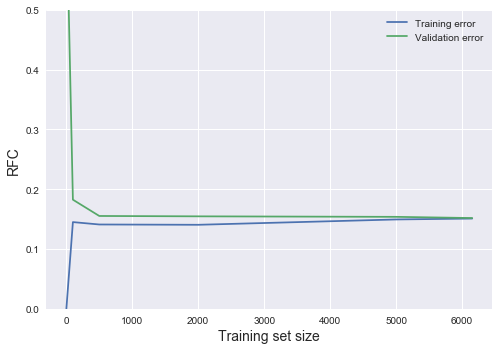

In [12]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = mlp,
    X = X_train,
    y = Y_train,
    train_sizes = [1, 100, 500, 2000, 5000, 6152],
    cv = 2,
    scoring = 'neg_mean_squared_error'
)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('RFC', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.legend()
plt.ylim(0,0.5)

## Logistic Regression ##

In [13]:
logreg = LogisticRegression(solver='liblinear', multi_class='auto') #(C=0.1, penalty='l1', tol=1e-6)
logreg.fit(X_train, Y_train)
# logistic_regression_result = logreg.predict(X_test)
acc = logreg.score(X_test, Y_test)
print(acc)

0.8571756601607348


## Support Vector Machines ##

In [14]:
svc = SVC(C = 0.1, gamma=0.1)
svc.fit(X_train, Y_train)

acc = svc.score(X_test, Y_test)
print(acc)

0.8599311136624569


## Random Forests ##

In [15]:
random_forest = RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    max_depth=11,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    random_state=50,
    verbose=0
)

random_forest.fit(X_train, Y_train)
acc = random_forest.score(X_test, Y_test)
print(acc)

0.8686567164179104
